In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [27]:
cost = pd.read_csv('cost_revenue_dirty.csv')

# Clean data

Fix column names

In [3]:
cost.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [34]:
cost.columns = cost.columns.str.lower().str.replace('($)', '', regex=False).str.strip().str.replace(' ', '_')
cost.columns

Index(['rank', 'release_date', 'movie_title', 'production_budget',
       'worldwide_gross', 'domestic_gross'],
      dtype='object')

In [35]:
money_cols = cost.columns[-3:]

Fix column data types

In [39]:
cost['release_date'] = pd.to_datetime(cost['release_date'], format='%m/%d/%Y')

In [37]:
for col in money_cols:
    cost[col] = cost[col].str.replace('$', '', regex=False).str.replace(',', '').astype(int)

In [43]:
cost.sort_values(by='rank', inplace=True)

In [44]:
cost.head()

,rank,release_date,movie_title,production_budget,worldwide_gross,domestic_gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4196,5,2012-07-20,The Dark Knight Rises,275000000,1084439099,448139099


In [41]:
cost.dtypes

rank                          int64
release_date         datetime64[ns]
movie_title                  object
production_budget             int64
worldwide_gross               int64
domestic_gross                int64
dtype: object

Remove unreleased or incomplete rows (`worldwide_gross` or `domestic_gross` equal to zero)

In [48]:
cost = cost[(cost['worldwide_gross'] != 0) & (cost['domestic_gross'] != 0)]

Keep only relevant columns (`production_budget` and `worldwide_gross`)

In [49]:
data = cost[['production_budget', 'worldwide_gross']]

# Investigate data

In [50]:
data.describe()

,production_budget,worldwide_gross
count,4.879000e+03,4.879000e+03
mean,3.355346e+07,9.788857e+07
std,4.154167e+07,1.746036e+08
min,1.100000e+03,4.010000e+02
25%,6.500000e+06,8.036698e+06
50%,2.000000e+07,3.455742e+07
75%,4.475000e+07,1.076746e+08
max,4.250000e+08,2.783919e+09


In [61]:
X = data[['production_budget']]
y = data['worldwide_gross']

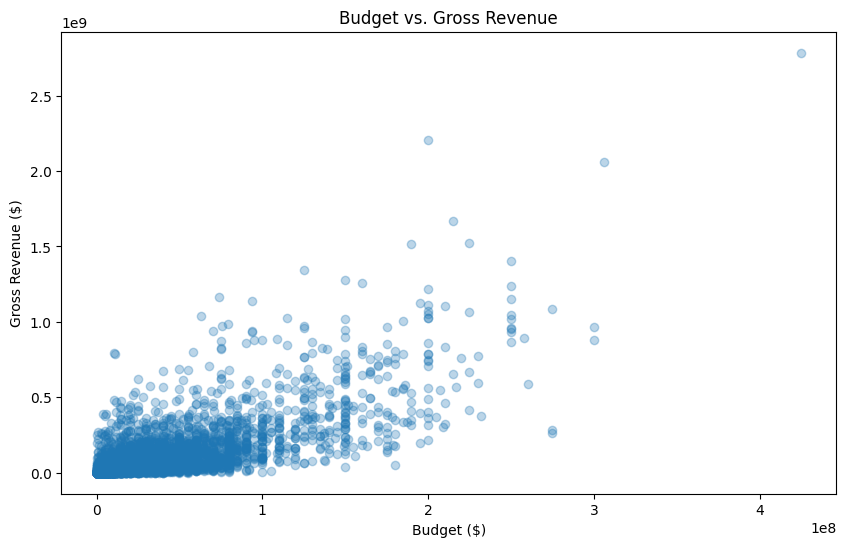

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.title('Budget vs. Gross Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Gross Revenue ($)')
plt.show()

# Linear Regression

In [59]:
regression = LinearRegression()

In [62]:
regression.fit(X, y)

LinearRegression()

Slope coefficient:

In [63]:
regression.coef_

array([3.11158929])

Intercept:

In [64]:
regression.intercept_

-6516010.528757572

Predicted value:

In [66]:
y_hat = regression.predict(X)

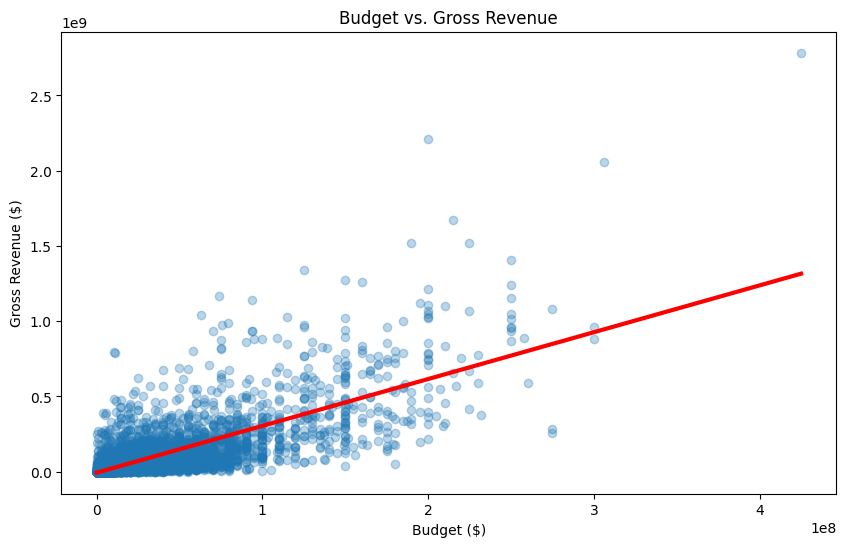

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.plot(X, y_hat, color='red', linewidth=3)
plt.title('Budget vs. Gross Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Gross Revenue ($)')
plt.show()

## Evaluate performance

A coefficient of 3.11 of revenue per \$ spent seems realistic, but a negative intercept of -6.5 millions \$ less so.

But let's look at how much is described by the model => R2

In [69]:
regression.score(X, y)

0.5480572766399464